**将列式数据变成二维交叉形式，便于分析，叫做重塑或者透视**
+ 经过统计得到多维度的指标数据
+ 使用unstack实现数据二维透视
+ 使用pivot简化透视
+ stack,unstack,pivot的语法
### 实例
+ 电影评分数据集，每个月份每个分数被评分多少次（月份，分数，次数）
+ 先对月份分组，再对评分分组，对userId的总人数进行统计

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
fpath="./datas/movielens-1m/ratings.dat"
df=pd.read_csv(fpath,header=None,
               sep="::",# 因为c engeine不支持两个字符的分割
               engine="python",
               names="userId,movieId,rating,timestamp".split(",")
        )
df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
# 1-5分每个月有多少人
df["date"]=pd.to_datetime(df["timestamp"],unit='s')
df.head()

,userId,movieId,rating,timestamp,date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [29]:
df1=df.groupby(["rating","movieId"]).agg({"userId":np.mean})
df1.head()

userId
rating movieId             
1      1        3741.875000
       2        2579.619048
       3        2754.113636
       4        2754.857143
       5        3460.821429

In [34]:
df2=df.groupby(["rating",df["date"].dt.month])["userId"].agg(pv=np.size)

df2.head()

pv
rating date      
1      1     1127
       2      629
       3      466
       4     1048
       5     4557

### 使用unstack实现数据的二维透视
目的：
rating作为横坐标，data作为数据量   
unstack() 就是分化为excel形式的x,y轴。   
stack()就是重新堆成列表形式

In [47]:
df_stack=df2.unstack()
df_stack.head()
type(df_stack)

pandas.core.frame.DataFrame

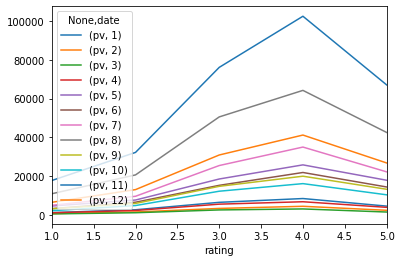

In [38]:
df_stack.plot()

分析，12月份上线的电影质量好一点，

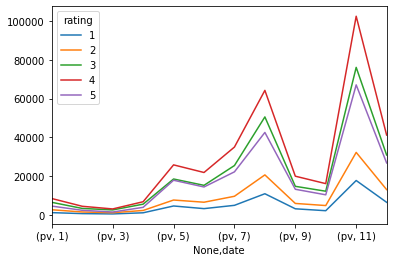

In [40]:
df3=df_stack.T
df3.plot()

In [42]:
df4=df["userId"].value_counts()  # 这一列每一个id的人数
df4.head()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
Name: userId, dtype: int64

### 使用pivot简化透视

In [44]:
df_reset=df2.reset_index()
df_reset.head()  # reset_index重置索引

,rating,date,pv
0,1,1,1127
1,1,2,629
2,1,3,466
3,1,4,1048
4,1,5,4557


In [46]:
df_pivot=df_reset.pivot("rating","date","pv")  # x轴，y轴，pv
df_pivot.head()  # 固定位置传参

date,1,2,3,4,5,6,7,8,9,10,11,12
rating,,,,,,,,,,,,
1,1127,629,466,1048,4557,3196,4891,10873,3107,2121,17701,6458
2,2608,1464,1077,2247,7631,6500,9566,20597,5873,4785,32202,13007
3,6442,3297,2523,5501,18481,15211,25421,50509,14702,12175,76069,30866
4,8400,4403,3032,6748,25769,21838,34957,64198,19927,16095,102448,41156
5,4495,2335,1439,3863,17840,14365,22169,42497,13182,10324,67041,26760


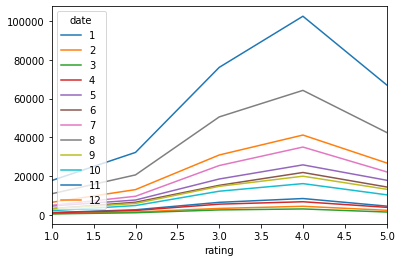

In [48]:
df_pivot.plot()